<a href="https://colab.research.google.com/github/KenyanGeek/Bank-Fraud-Detection-Using-Python/blob/master/Bank_Fraud_Code_with_73_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 SMOTE for Fraud Detection using XGBOOST

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"



Updating fastai...
Done.
Mounted at /content/gdrive


In [0]:
!pip install fastai==0.7


  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: fastai 1.0.53.post2
    Uninstalling fastai-1.0.53.post2:
      Successfully uninstalled fastai-1.0.53.post2


In [0]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/data/training.csv")
df_test =  pd.read_csv("/content/gdrive/My Drive/data/test.csv")



In [0]:
data['sum'] =  data[['Amount', 'Value']].sum(axis=1)
data['mean'] =  data[['Amount', 'Value']].mean(axis=1)
data['max'] =  data[['Amount', 'Value']].max(axis=1)
data['min'] =  data[['Amount', 'Value']].min(axis=1)
data['std'] =  data[['Amount', 'Value']].std(axis=1)
data['var'] =  data[['Amount', 'Value']].var(axis=1)


df_test['sum'] =  df_test[['Amount', 'Value']].sum(axis=1)
df_test['mean'] =  df_test[['Amount', 'Value']].mean(axis=1)
df_test['max'] =  df_test[['Amount', 'Value']].max(axis=1)
df_test['min'] =  df_test[['Amount', 'Value']].min(axis=1)
df_test['std'] =  df_test[['Amount', 'Value']].std(axis=1)
df_test['var'] =  df_test[['Amount', 'Value']].var(axis=1)

In [0]:
data.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,sum,mean,max,min,std,var
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_4,1000.0,1000,2018-11-15T02:18:49Z,2,0,2000.0,1000.0,1000.0,1000.0,0.000000,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,0.0,0.0,20.0,-20.0,28.284271,800.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.0,500.0,500.0,500.0,0.000000,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,41800.0,20900.0,21800.0,20000.0,1272.792206,1620000.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,0.0,0.0,644.0,-644.0,910.753534,829472.0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0,4000.0,2000.0,2000.0,2000.0,0.000000,0.0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0,20000.0,10000.0,10000.0,10000.0,0.000000,0.0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0,0.0,0.0,500.0,-500.0,707.106781,500000.0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0,1000.0,500.0,500.0,500.0,0.000000,0.0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0,1200.0,600.0,600.0,600.0,0.000000,0.0


In [0]:
data.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,sum,mean,max,min,std,var
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_4,1000.0,1000,2018-11-15T02:18:49Z,2,0,2000.0,1000.0,1000.0,1000.0,0.000000,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,0.0,0.0,20.0,-20.0,28.284271,800.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.0,500.0,500.0,500.0,0.000000,0.0


In [0]:
#knowing if it is a weekend or not

data['Weekend'] = ((pd.DatetimeIndex(data.TransactionStartTime).dayofweek) // 5 == 1)
df_test['Weekend'] = ((pd.DatetimeIndex(df_test.TransactionStartTime).dayofweek) // 5 == 1)

#learning more from the date part

def splitDatetime(data) :

   datatime = pd.DatetimeIndex(data.TransactionStartTime) 
  
   data['Hour'] = datatime.hour

   return data
  
splitDatetime(data)
splitDatetime(df_test).head(3)

#knowing which part of the day these transactons are happening

def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    

data.loc[ : , 'partofday'] = data['Hour'].apply(f)

df_test.loc[ : , 'partofday'] = df_test['Hour'].apply(f)


import math


# Use .apply to save the new column if we'd like
data['log_value'] = data['Value'].apply(lambda row: math.log(row, 10) )
df_test['log_value'] = df_test['Value'].apply(lambda row: math.log(row, 10) )

from fastai.structured import *
add_datepart(data, 'TransactionStartTime')
add_datepart(df_test, 'TransactionStartTime')



In [0]:
print(len(data.columns))
print(len(df_test.columns))

38
38


In [0]:
df_test.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,sum,mean,max,min,std,var,Weekend,Hour,partofday,log_value,TransactionStartTimeYear,TransactionStartTimeMonth,TransactionStartTimeWeek,TransactionStartTimeDay,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,TransactionStartTimeElapsed
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,NaN,2000.0,1000.0,1000.0,1000.0,0.000000,0.0,False,10,Morning,3.00000,2019,2,7,13,2,44,False,False,False,False,False,False,1550052100
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,NaN,4000.0,2000.0,2000.0,2000.0,0.000000,0.0,False,10,Morning,3.30103,2019,2,7,13,2,44,False,False,False,False,False,False,1550052132
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,NaN,0.0,0.0,50.0,-50.0,70.710678,5000.0,False,10,Morning,1.69897,2019,2,7,13,2,44,False,False,False,False,False,False,1550052150


In [0]:
print(len(data.columns))
print(len(df_test.columns))


38
38


In [0]:
import matplotlib.pyplot as plt


corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,CountryCode,Amount,Value,PricingStrategy,FraudResult,sum,mean,max,min,std,var,Weekend,Hour,log_value,TransactionStartTimeYear,TransactionStartTimeMonth,TransactionStartTimeWeek,TransactionStartTimeDay,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,TransactionStartTimeElapsed
CountryCode,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Amount,nan,1,0.99,-0.062,0.56,1,1,0.99,1,-0.082,-0.053,0.0038,-0.0016,0.15,0.011,-0.0091,-0.0085,-0.0039,0.0042,-0.0091,-0.0028,0.013,-0.0033,-0.0019,-0.0033,-0.0019,0.019
Value,nan,0.99,1,-0.017,0.57,1,1,1,0.99,0.061,0.051,-0.008,0.00047,0.18,0.012,-0.01,-0.01,-0.024,-0.014,-0.012,-0.0061,0.011,-0.0055,-0.0039,-0.0055,-0.0039,0.013
PricingStrategy,nan,-0.062,-0.017,1,-0.034,-0.04,-0.04,-0.017,-0.062,0.31,0.031,-0.067,0.0074,0.24,0.03,-0.031,-0.034,-0.13,-0.12,-0.038,-0.017,-0.016,-0.012,-0.011,-0.012,-0.011,-0.028
FraudResult,nan,0.56,0.57,-0.034,1,0.56,0.56,0.57,0.56,0.059,0.066,4.3e-05,0.0083,0.14,0.0098,-0.0089,-0.0083,-0.0086,-0.0069,-0.0092,-0.0063,0.015,-0.0041,0.0011,-0.0041,0.0011,0.012
sum,nan,1,1,-0.04,0.56,1,1,1,1,-0.01,-0.00097,-0.0021,-0.00057,0.17,0.011,-0.0098,-0.0094,-0.014,-0.0048,-0.01,-0.0045,0.012,-0.0044,-0.0029,-0.0044,-0.0029,0.016
mean,nan,1,1,-0.04,0.56,1,1,1,1,-0.01,-0.00097,-0.0021,-0.00057,0.17,0.011,-0.0098,-0.0094,-0.014,-0.0048,-0.01,-0.0045,0.012,-0.0044,-0.0029,-0.0044,-0.0029,0.016
max,nan,0.99,1,-0.017,0.57,1,1,1,0.99,0.061,0.051,-0.008,0.00047,0.18,0.012,-0.01,-0.01,-0.024,-0.014,-0.012,-0.0061,0.011,-0.0055,-0.0039,-0.0055,-0.0039,0.013
min,nan,1,0.99,-0.062,0.56,1,1,0.99,1,-0.082,-0.053,0.0038,-0.0016,0.15,0.011,-0.0091,-0.0085,-0.0039,0.0042,-0.0091,-0.0028,0.013,-0.0033,-0.0019,-0.0033,-0.0019,0.019
std,nan,-0.082,0.061,0.31,0.059,-0.01,-0.01,0.061,-0.082,1,0.72,-0.082,0.015,0.25,0.0087,-0.0096,-0.013,-0.14,-0.13,-0.017,-0.023,-0.019,-0.016,-0.014,-0.016,-0.014,-0.047


In [0]:
data.columns


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value', 'PricingStrategy',
       'FraudResult', 'sum', 'mean', 'max', 'min', 'std', 'var', 'Weekend',
       'Hour', 'partofday', 'log_value', 'TransactionStartTimeYear',
       'TransactionStartTimeMonth', 'TransactionStartTimeWeek',
       'TransactionStartTimeDay', 'TransactionStartTimeDayofweek',
       'TransactionStartTimeDayofyear', 'TransactionStartTimeIs_month_end',
       'TransactionStartTimeIs_month_start',
       'TransactionStartTimeIs_quarter_end',
       'TransactionStartTimeIs_quarter_start',
       'TransactionStartTimeIs_year_end', 'TransactionStartTimeIs_year_start',
       'TransactionStartTimeElapsed'],
      dtype='object')

In [0]:
df_test.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,sum,mean,max,min,std,var,Weekend,Hour,partofday,log_value,TransactionStartTimeYear,TransactionStartTimeMonth,TransactionStartTimeWeek,TransactionStartTimeDay,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,TransactionStartTimeElapsed
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,NaN,2000.0,1000.0,1000.0,1000.0,0.000000,0.0,False,10,Morning,3.000000,2019,2,7,13,2,44,False,False,False,False,False,False,1550052100
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,NaN,4000.0,2000.0,2000.0,2000.0,0.000000,0.0,False,10,Morning,3.301030,2019,2,7,13,2,44,False,False,False,False,False,False,1550052132
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,NaN,0.0,0.0,50.0,-50.0,70.710678,5000.0,False,10,Morning,1.698970,2019,2,7,13,2,44,False,False,False,False,False,False,1550052150
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,4,NaN,6000.0,3000.0,3000.0,3000.0,0.000000,0.0,False,10,Morning,3.477121,2019,2,7,13,2,44,False,False,False,False,False,False,1550052158
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2,NaN,0.0,0.0,60.0,-60.0,84.852814,7200.0,False,10,Morning,1.778151,2019,2,7,13,2,44,False,False,False,False,False,False,1550052178
5,TransactionId_134338,BatchId_67575,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2,NaN,2000.0,1000.0,1000.0,1000.0,0.000000,0.0,False,10,Morning,3.000000,2019,2,7,13,2,44,False,False,False,False,False,False,1550052192
6,TransactionId_109096,BatchId_52375,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,NaN,0.0,0.0,50.0,-50.0,70.710678,5000.0,False,10,Morning,1.698970,2019,2,7,13,2,44,False,False,False,False,False,False,1550052228
7,TransactionId_14249,BatchId_112552,AccountId_2908,SubscriptionId_2977,CustomerId_3332,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.0,1000,1,NaN,2000.0,1000.0,1000.0,1000.0,0.000000,0.0,False,10,Morning,3.000000,2019,2,7,13,2,44,False,False,False,False,False,False,1550052586
8,TransactionId_69896,BatchId_60867,AccountId_4841,SubscriptionId_3829,CustomerId_3332,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,NaN,0.0,0.0,50.0,-50.0,70.710678,5000.0,False,10,Morning,1.698970,2019,2,7,13,2,44,False,False,False,False,False,False,1550052684
9,TransactionId_91468,BatchId_14721,AccountId_460,SubscriptionId_2976,CustomerId_790,UGX,256,ProviderId_3,ProductId_14,financial_services,ChannelId_3,1161.0,1161,0,NaN,2322.0,1161.0,1161.0,1161.0,0.000000,0.0,False,10,Morning,3.064832,2019,2,7,13,2,44,False,False,False,False,False,False,1550052728


In [0]:
data = data.drop(columns=['CurrencyCode','CountryCode', 'AccountId', 'SubscriptionId','CustomerId','TransactionStartTimeYear',
                          'TransactionStartTimeMonth','TransactionStartTimeWeek','TransactionStartTimeDay'])
df_test = df_test.drop(columns=['FraudResult','CurrencyCode','CountryCode', 'AccountId', 'SubscriptionId',
                                'CustomerId','TransactionStartTimeYear','TransactionStartTimeMonth','TransactionStartTimeWeek','TransactionStartTimeDay'])

0    95469
1      193
Name: FraudResult, dtype: int64

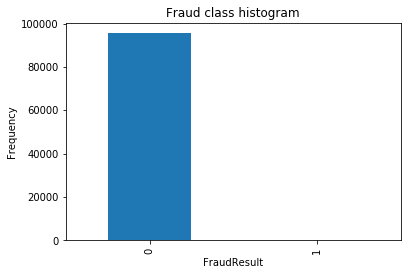

In [0]:
pd.value_counts(data['FraudResult']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('FraudResult')
plt.ylabel('Frequency')
data['FraudResult'].value_counts()

In [0]:
result = pd.concat([data,df_test])
result.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Amount,FraudResult,Hour,PricingStrategy,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,Value,log_value,max,mean,min,std,sum,var
count,1.406810e+05,95662.000000,140681.000000,140681.000000,140681.000000,140681.00000,1.406810e+05,1.406810e+05,140681.000000,1.406810e+05,1.406810e+05,1.406810e+05,1.406810e+05,1.406810e+05,1.406810e+05
mean,6.050578e+03,0.002018,12.446002,2.257469,3.047419,144.35702,1.547949e+09,1.002851e+04,3.052386,1.002851e+04,8.039543e+03,6.050578e+03,2.812822e+03,1.607909e+04,4.323647e+08
std,1.153134e+05,0.044872,4.905719,0.735089,1.803364,145.25876,2.941843e+06,1.150626e+05,0.938810,1.150626e+05,1.142631e+05,1.153134e+05,2.060232e+04,2.285262e+05,3.584052e+10
min,-2.500000e+06,0.000000,0.000000,0.000000,0.000000,1.00000,1.542248e+09,2.000000e+00,0.301030,2.000000e+00,0.000000e+00,-2.500000e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.000000e+01,0.000000,8.000000,2.000000,1.000000,33.00000,1.545388e+09,3.920000e+02,2.593286,3.920000e+02,0.000000e+00,-5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+03,0.000000,13.000000,2.000000,3.000000,59.00000,1.548351e+09,1.000000e+03,3.000000,1.000000e+03,1.000000e+03,1.000000e+03,0.000000e+00,2.000000e+03,0.000000e+00
75%,3.000000e+03,0.000000,17.000000,2.000000,4.000000,335.00000,1.550514e+09,5.000000e+03,3.698970,5.000000e+03,3.000000e+03,3.000000e+03,8.485281e+01,6.000000e+03,7.200000e+03
max,9.880000e+06,1.000000,23.000000,4.000000,6.000000,365.00000,1.552608e+09,9.880000e+06,6.994757,9.880000e+06,9.880000e+06,9.880000e+06,3.535534e+06,1.976000e+07,1.250000e+13


In [0]:
from fastai.structured import *


train_cats(result)
result

,Amount,BatchId,ChannelId,FraudResult,Hour,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,partofday,std,sum,var
0,1000.0,BatchId_36123,ChannelId_4,0.0,2,2,airtime,ProductId_10,ProviderId_6,TransactionId_76871,3,319,1542248329,False,False,False,False,False,False,1000,False,3.000000,1000.0,1000.0,1000.0,Late Night,0.000000,2000.0,0.0
1,-20.0,BatchId_15642,ChannelId_2,0.0,2,2,financial_services,ProductId_6,ProviderId_4,TransactionId_73770,3,319,1542248348,False,False,False,False,False,False,20,False,1.301030,20.0,0.0,-20.0,Late Night,28.284271,0.0,800.0
2,500.0,BatchId_53941,ChannelId_3,0.0,2,2,airtime,ProductId_1,ProviderId_6,TransactionId_26203,3,319,1542249861,False,False,False,False,False,False,500,False,2.698970,500.0,500.0,500.0,Late Night,0.000000,1000.0,0.0
3,20000.0,BatchId_102363,ChannelId_3,0.0,3,2,utility_bill,ProductId_21,ProviderId_1,TransactionId_380,3,319,1542252775,False,False,False,False,False,False,21800,False,4.338456,21800.0,20900.0,20000.0,Late Night,1272.792206,41800.0,1620000.0
4,-644.0,BatchId_38780,ChannelId_2,0.0,3,2,financial_services,ProductId_6,ProviderId_4,TransactionId_28195,3,319,1542252861,False,False,False,False,False,False,644,False,2.808886,644.0,0.0,-644.0,Late Night,910.753534,0.0,829472.0
5,2000.0,BatchId_25954,ChannelId_3,0.0,3,2,airtime,ProductId_3,ProviderId_6,TransactionId_23223,3,319,1542252910,False,False,False,False,False,False,2000,False,3.301030,2000.0,2000.0,2000.0,Late Night,0.000000,4000.0,0.0
6,10000.0,BatchId_118460,ChannelId_3,0.0,3,4,airtime,ProductId_3,ProviderId_5,TransactionId_118063,3,319,1542253471,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Late Night,0.000000,20000.0,0.0
7,-500.0,BatchId_38561,ChannelId_2,0.0,3,2,financial_services,ProductId_6,ProviderId_4,TransactionId_100640,3,319,1542253513,False,False,False,False,False,False,500,False,2.698970,500.0,0.0,-500.0,Late Night,707.106781,0.0,500000.0
8,500.0,BatchId_93774,ChannelId_3,0.0,4,2,airtime,ProductId_10,ProviderId_6,TransactionId_51905,3,319,1542255299,False,False,False,False,False,False,500,False,2.698970,500.0,500.0,500.0,Late Night,0.000000,1000.0,0.0
9,600.0,BatchId_82409,ChannelId_3,0.0,4,2,financial_services,ProductId_15,ProviderId_1,TransactionId_130161,3,319,1542256308,False,False,False,False,False,False,600,False,2.778151,600.0,600.0,600.0,Late Night,0.000000,1200.0,0.0


In [0]:
result.tail(3)

,Amount,BatchId,ChannelId,FraudResult,Hour,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,partofday,std,sum,var
45016,10000.0,BatchId_112209,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_102920,3,73,1552607957,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45017,-5000.0,BatchId_58734,ChannelId_3,NaN,23,2,financial_services,ProductId_6,ProviderId_4,TransactionId_128439,3,73,1552607979,False,False,False,False,False,False,5000,False,3.698970,5000.0,0.0,-5000.0,Night,7071.067812,0.0,50000000.0
45018,3500.0,BatchId_98308,ChannelId_3,NaN,23,4,airtime,ProductId_3,ProviderId_5,TransactionId_45927,3,73,1552607991,False,False,False,False,False,False,3500,False,3.544068,3500.0,3500.0,3500.0,Night,0.000000,7000.0,0.0


In [0]:
df1 = result.iloc[:95662]
df2 = result.iloc[95662:]

df1.describe(include='all')

,Amount,BatchId,ChannelId,FraudResult,Hour,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,partofday,std,sum,var
count,9.566200e+04,95662,95662,95662.000000,95662.000000,95662.000000,95662,95662,95662,95662,95662.000000,95662.000000,9.566200e+04,95662,95662,95662,95662,95662,95662,9.566200e+04,95662,95662.000000,9.566200e+04,9.566200e+04,9.566200e+04,95662,9.566200e+04,9.566200e+04,9.566200e+04
unique,NaN,94809,5,NaN,NaN,NaN,9,23,6,95662,NaN,NaN,NaN,2,2,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
top,NaN,BatchId_67019,ChannelId_3,NaN,NaN,NaN,financial_services,ProductId_6,ProviderId_4,TransactionId_99999,NaN,NaN,NaN,False,False,False,False,False,False,NaN,False,NaN,NaN,NaN,NaN,Noon,NaN,NaN,NaN
freq,NaN,28,56934,NaN,NaN,NaN,45405,32635,38189,1,NaN,NaN,NaN,92142,91203,94862,94885,94862,94885,NaN,75873,NaN,NaN,NaN,NaN,23994,NaN,NaN,NaN
mean,6.717846e+03,NaN,NaN,0.002018,12.447722,2.255974,NaN,NaN,NaN,NaN,3.011907,185.066306,1.546392e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.900584e+03,NaN,3.026471,9.900584e+03,8.309215e+03,6.717846e+03,NaN,2.250535e+03,1.661843e+04,1.615722e+08
std,1.233068e+05,NaN,NaN,0.044872,4.846964,0.732924,NaN,NaN,NaN,NaN,1.863651,160.676206,2.210932e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.231221e+05,NaN,0.936705,1.231221e+05,1.228965e+05,1.233068e+05,NaN,1.251035e+04,2.457930e+05,1.095184e+10
min,-1.000000e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.542248e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,0.301030,2.000000e+00,0.000000e+00,-1.000000e+06,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.000000e+01,NaN,NaN,0.000000,8.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,25.000000,1.544608e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.750000e+02,NaN,2.439333,2.750000e+02,0.000000e+00,-5.000000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+03,NaN,NaN,0.000000,13.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,319.000000,1.546277e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+03,NaN,3.000000,1.000000e+03,1.000000e+03,1.000000e+03,NaN,0.000000e+00,2.000000e+03,0.000000e+00
75%,2.800000e+03,NaN,NaN,0.000000,17.000000,2.000000,NaN,NaN,NaN,NaN,4.000000,346.000000,1.548414e+09,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+03,NaN,3.698970,5.000000e+03,2.800000e+03,2.800000e+03,NaN,7.071068e+01,5.600000e+03,5.000000e+03


In [0]:

df2.tail(10)

,Amount,BatchId,ChannelId,FraudResult,Hour,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,partofday,std,sum,var
45009,10000.0,BatchId_75172,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_46151,3,73,1552607581,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45010,-5000.0,BatchId_102543,ChannelId_3,NaN,23,2,financial_services,ProductId_6,ProviderId_4,TransactionId_109121,3,73,1552607643,False,False,False,False,False,False,5000,False,3.698970,5000.0,0.0,-5000.0,Night,7071.067812,0.0,50000000.0
45011,10000.0,BatchId_83188,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_30094,3,73,1552607676,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45012,-5000.0,BatchId_55857,ChannelId_3,NaN,23,2,financial_services,ProductId_6,ProviderId_4,TransactionId_73077,3,73,1552607739,False,False,False,False,False,False,5000,False,3.698970,5000.0,0.0,-5000.0,Night,7071.067812,0.0,50000000.0
45013,10000.0,BatchId_19757,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_135846,3,73,1552607766,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45014,-5000.0,BatchId_117348,ChannelId_3,NaN,23,2,financial_services,ProductId_6,ProviderId_4,TransactionId_116198,3,73,1552607788,False,False,False,False,False,False,5000,False,3.698970,5000.0,0.0,-5000.0,Night,7071.067812,0.0,50000000.0
45015,10000.0,BatchId_53630,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_24829,3,73,1552607858,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45016,10000.0,BatchId_112209,ChannelId_3,NaN,23,1,airtime,ProductId_10,ProviderId_3,TransactionId_102920,3,73,1552607957,False,False,False,False,False,False,10000,False,4.000000,10000.0,10000.0,10000.0,Night,0.000000,20000.0,0.0
45017,-5000.0,BatchId_58734,ChannelId_3,NaN,23,2,financial_services,ProductId_6,ProviderId_4,TransactionId_128439,3,73,1552607979,False,False,False,False,False,False,5000,False,3.698970,5000.0,0.0,-5000.0,Night,7071.067812,0.0,50000000.0
45018,3500.0,BatchId_98308,ChannelId_3,NaN,23,4,airtime,ProductId_3,ProviderId_5,TransactionId_45927,3,73,1552607991,False,False,False,False,False,False,3500,False,3.544068,3500.0,3500.0,3500.0,Night,0.000000,7000.0,0.0


In [0]:
#Design 1: Without mapper and no one hot encoding

'''df, y , nas = proc_df(df1, 'FraudResult')
test,_,nas = proc_df(df2, na_dict=nas)
df, y , nas = proc_df(df1, 'FraudResult', na_dict=nas)'''

#Design 2: Without one hot encoding

'''df, y , nas, mapper  = proc_df(df1, 'FraudResult', do_scale=True)
test,_,nas, mapper = proc_df(df2, na_dict=nas, mapper=mapper,do_scale=True,)
df, y , nas, mapper = proc_df(df1, 'FraudResult', na_dict=nas, do_scale=True)
'''
#Design 3: Without all the juices
df, y , nas, mapper  = proc_df(df1, 'FraudResult', do_scale=True, max_n_cat=6)
test,_,nas, mapper = proc_df(df2, na_dict=nas, mapper=mapper,do_scale=True, max_n_cat=6 )
df, y , nas, mapper = proc_df(df1, 'FraudResult', na_dict=nas, do_scale=True, max_n_cat=6)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
test = test.drop(columns=['FraudResult','FraudResult_na'])

In [0]:
print(len(df.columns))
print(len(test.columns))

45
45


In [0]:
df.head(8)


,Amount,BatchId,Hour,PricingStrategy,ProductCategory,ProductId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,std,sum,var,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5,ChannelId_nan,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProviderId_nan,partofday_Early Morning,partofday_Eve,partofday_Late Night,partofday_Morning,partofday_Night,partofday_Noon,partofday_nan
0,-0.046371,68523,-2.155530,-0.349252,1,2,114985,-0.006389,0.833567,-1.874072,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.072291,-0.510703,-0.028260,-0.072291,-0.059475,-0.046371,-0.179895,-0.059475,-0.014753,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,-0.054643,45766,-2.155530,-0.349252,3,24,111540,-0.006389,0.833567,-1.874063,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.080251,-0.510703,-1.842042,-0.080251,-0.067612,-0.054643,-0.177634,-0.067612,-0.014753,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-0.050426,88320,-2.155530,-0.349252,1,1,58689,-0.006389,0.833567,-1.873379,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.076352,-0.510703,-0.349633,-0.076352,-0.063543,-0.050426,-0.179895,-0.063543,-0.014753,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.107717,2630,-1.949214,-0.349252,10,14,71795,-0.006389,0.833567,-1.872061,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,0.096648,-0.510703,1.400646,0.096648,0.102451,0.107717,-0.078155,0.102451,-0.014605,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.059704,71474,-1.949214,-0.349252,3,24,60901,-0.006389,0.833567,-1.872022,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.075183,-0.510703,-0.232289,-0.075183,-0.067612,-0.059704,-0.107094,-0.067612,-0.014677,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,-0.038261,57223,-1.949214,-0.349252,1,21,55378,-0.006389,0.833567,-1.872000,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.064169,-0.510703,0.293113,-0.064169,-0.051338,-0.038261,-0.179895,-0.051338,-0.014753,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,0.026618,20515,-1.949214,2.379557,1,21,20074,-0.006389,0.833567,-1.871746,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,0.000807,-0.510703,1.039317,0.000807,0.013758,0.026618,-0.179895,0.013758,-0.014753,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,-0.058536,71231,-1.949214,-0.349252,3,24,716,-0.006389,0.833567,-1.871727,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.076352,-0.510703,-0.349633,-0.076352,-0.067612,-0.058536,-0.123373,-0.067612,-0.014707,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [0]:
test.head(3)

,Amount,BatchId,Hour,PricingStrategy,ProductCategory,ProductId,TransactionId,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeElapsed,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,Value,Weekend,log_value,max,mean,min,std,sum,var,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5,ChannelId_nan,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProviderId_nan,partofday_Early Morning,partofday_Eve,partofday_Late Night,partofday_Morning,partofday_Night,partofday_Noon,partofday_nan
0,-0.046371,67306,-0.505004,2.379557,1,21,85797,-0.542973,-0.877959,1.655576,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.072291,-0.510703,-0.028260,-0.072291,-0.059475,-0.046371,-0.179895,-0.059475,-0.014753,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.038261,78540,-0.505004,-0.349252,3,7,135250,-0.542973,-0.877959,1.655590,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.064169,-0.510703,0.293113,-0.064169,-0.051338,-0.038261,-0.179895,-0.051338,-0.014753,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-0.054887,111592,-0.505004,-0.349252,3,24,82192,-0.542973,-0.877959,1.655598,-0.195453,-0.221113,-0.091833,-0.090492,-0.091833,-0.090492,-0.080007,-0.510703,-1.417210,-0.080007,-0.067612,-0.054887,-0.174243,-0.067612,-0.014753,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [0]:
df = np.array(df)
y =  np.array(y)
test = np.array(test)


print('Shape of df: {}'.format(df.shape))
print('Shape of y: {}'.format(y.shape))
print('Shape of test: {}'.format(test.shape))

Shape of df: (95662, 45)
Shape of y: (95662,)
Shape of test: (45019, 45)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, accuracy_score
'''from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_sample(df, y)'''

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 42)




print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_valid dataset: ", X_test.shape)
print("Number transactions y_valid  dataset: ", y_test.shape)

Number transactions X_train dataset:  (71746, 45)
Number transactions y_train dataset:  (71746,)
Number transactions X_valid dataset:  (23916, 45)
Number transactions y_valid  dataset:  (23916,)


In [0]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Normal','Fraud']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [0]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

Classification of SMOTE-resampled dataset with XGboost


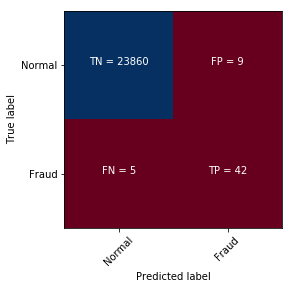

Recall=0.894 
Precision=0.824
F1=0.857
Average precision-recall score: 0.927


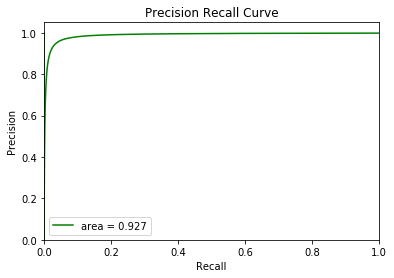

f1=0.857 auc=0.926 ap=0.927


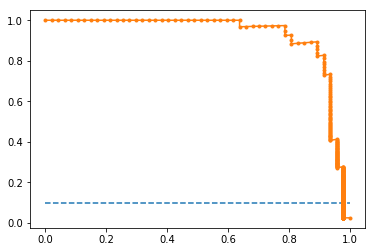

In [0]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc



#best XGB classifer
model = XGBClassifier(max_depth=1, min_child_weight=1,  n_estimators=1000, n_jobs=-1 , verbose=1, learning_rate=0.2,  scale_pos_weight = 10)

#
#fit the best models so far
model.fit(X_train, y_train)

#Make predictions
print('Classification of SMOTE-resampled dataset with XGboost')
y_pred = model.predict(X_test)
try:
    scores = model.decision_function(X_test)
except:
    scores = model.predict_proba(X_test)[:,1]
#Make plots
y_pred = model.predict(X_test)
plot_cm(model, y_pred)
plot_aucprc(model, scores)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [0]:
# perform predictions on test set for XGBOOST
df_test =  pd.read_csv("/content/gdrive/My Drive/data/test.csv")
df_xgb= pd.DataFrame(model.predict(test), 
                           index = df_test.TransactionId, 
                           columns = ['FraudResult'])

df_xgb.to_csv('customeridback.csv', header = True)

In [0]:
'''import pandas as pd 
pd.DataFrame(test).to_csv("test.csv")'''

'import pandas as pd \npd.DataFrame(test).to_csv("test.csv")'